In [3]:
!pip install imblearn

In [4]:
import imblearn


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

In [5]:
data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape, data.dtypes

((7043, 21),
 customerID           object
 gender               object
 SeniorCitizen         int64
 Partner              object
 Dependents           object
 tenure                int64
 PhoneService         object
 MultipleLines        object
 InternetService      object
 OnlineSecurity       object
 OnlineBackup         object
 DeviceProtection     object
 TechSupport          object
 StreamingTV          object
 StreamingMovies      object
 Contract             object
 PaperlessBilling     object
 PaymentMethod        object
 MonthlyCharges      float64
 TotalCharges         object
 Churn                object
 dtype: object)

In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
for column in data.columns:
    print(data[column].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

In [9]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')
data.shape, data.dtypes

((7043, 21),
 customerID           object
 gender               object
 SeniorCitizen        object
 Partner              object
 Dependents           object
 tenure                int64
 PhoneService         object
 MultipleLines        object
 InternetService      object
 OnlineSecurity       object
 OnlineBackup         object
 DeviceProtection     object
 TechSupport          object
 StreamingTV          object
 StreamingMovies      object
 Contract             object
 PaperlessBilling     object
 PaymentMethod        object
 MonthlyCharges      float64
 TotalCharges         object
 Churn                object
 dtype: object)

In [10]:
data1 = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']]

<AxesSubplot: xlabel='Churn', ylabel='count'>

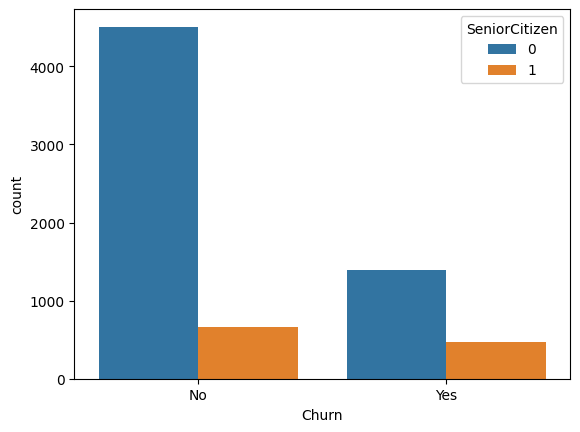

In [12]:
sns.countplot(x=data1.Churn, hue = data1.SeniorCitizen)

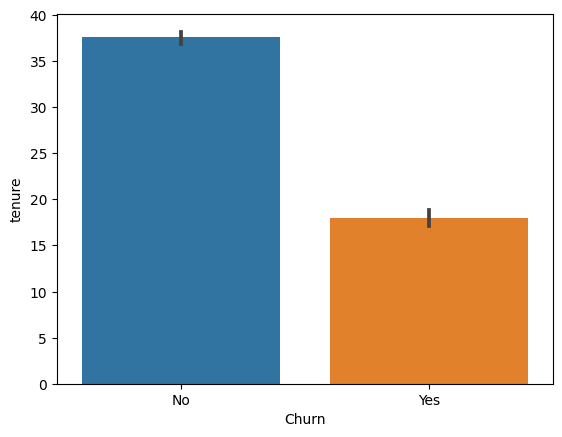

In [13]:
sns.barplot(y="tenure", x="Churn", data=data1)
plt.show()

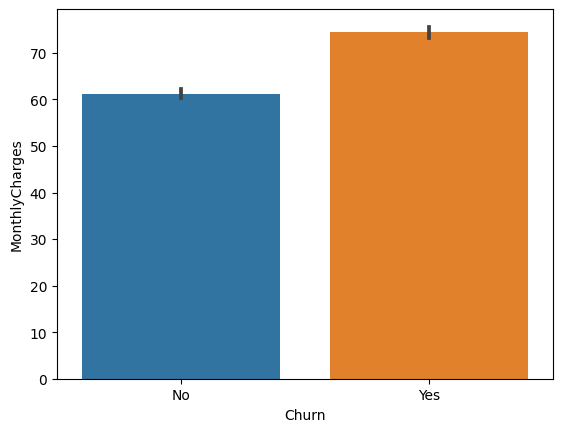

In [14]:
sns.barplot(y="MonthlyCharges", x="Churn", data=data1)
plt.show()

<AxesSubplot: xlabel='Churn', ylabel='tenure'>

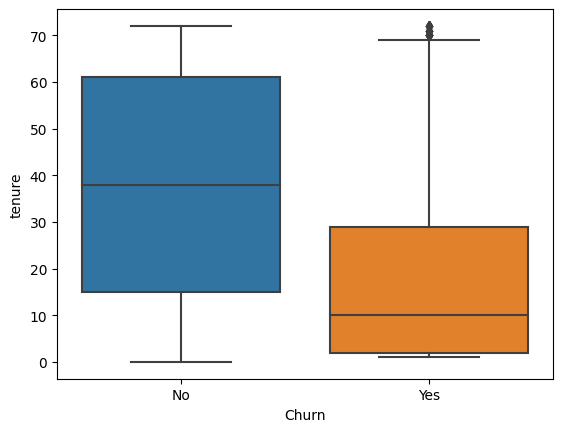

In [15]:
sns.boxplot(x = data1.Churn, y = data1.tenure)

<AxesSubplot: xlabel='Churn', ylabel='MonthlyCharges'>

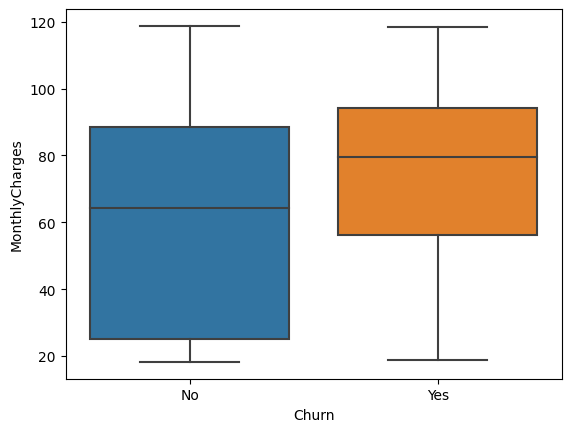

In [16]:
sns.boxplot(x = data1.Churn, y = data1.MonthlyCharges)

# EDA

C:\Users\A73547\AppData\Local\Temp\ipykernel_2908\2738585492.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data1.corr(method='pearson')  # default


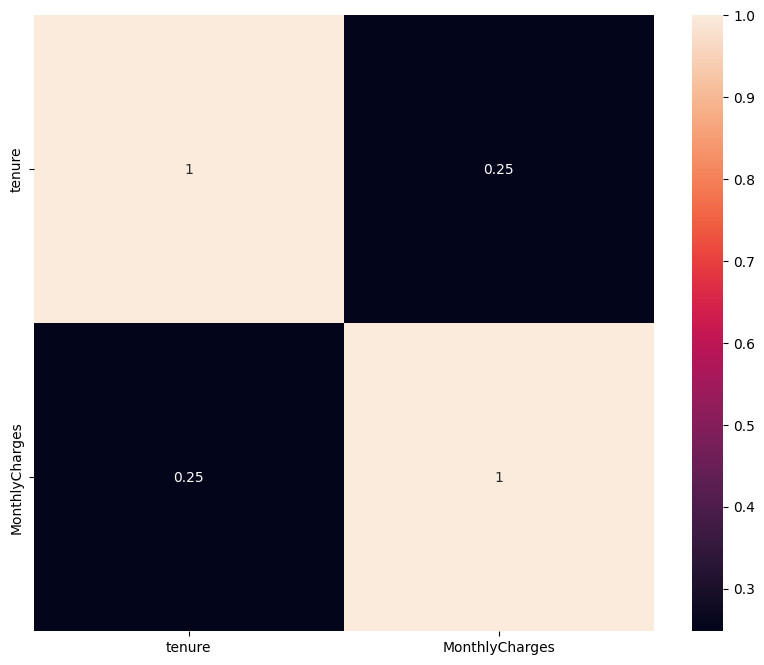

In [18]:
corr_matrix=data1.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

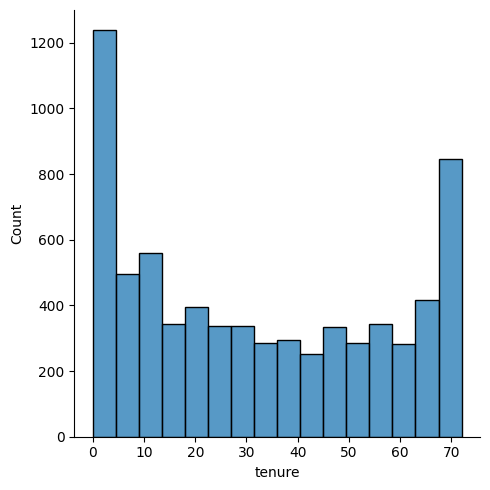

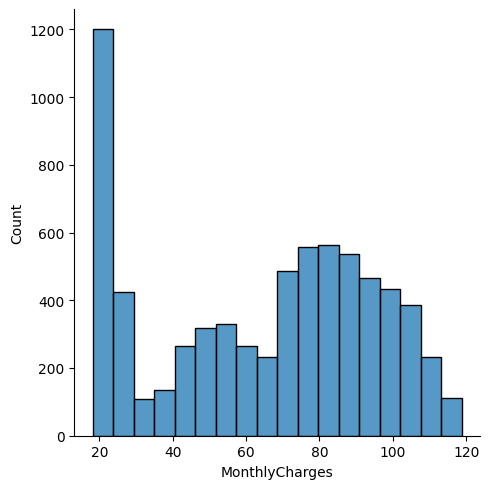

In [77]:
for col in data1.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

In [20]:
from scipy import stats



def boxcox_transform(data1):
    numeric_cols = data1.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        
        data1[column] = np.where(data1[column]<=0, np.NAN, data1[column]) 
        data1[column] = data1[column].fillna(data1[column].mean())
        transformed_data, ci = stats.boxcox(data1[column])
        data1[column] = transformed_data
        _ci[column] = [ci] 
    return data1, _ci

data1, _ci = boxcox_transform(data1)
data1

C:\Users\A73547\AppData\Local\Temp\ipykernel_2908\976573208.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[column] = np.where(data1[column]<=0, np.NAN, data1[column])
C:\Users\A73547\AppData\Local\Temp\ipykernel_2908\976573208.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[column] = data1[column].fillna(data1[column].mean())
C:\Users\A73547\AppData\Local\Temp\ipykernel_2908\976573208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,7.686891,21.916661,No
1,0,8.371933,41.024574,No
2,0,-0.183305,38.891655,Yes
3,0,10.050975,30.837106,No
4,0,-0.183305,50.362780,Yes
...,...,...,...,...
7038,0,6.580338,59.763628,No
7039,0,13.432835,71.816688,No
7040,0,3.518256,21.734359,No
7041,1,0.953416,52.845312,Yes


In [21]:
#benchmark model
X = pd.get_dummies(data1.drop('Churn', axis=1))
# watch out! rookie mistake: DO NOT dummify the target variable
y = data1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

#simple model without any imbalancing technique gives us more than 70% accuracy as the data itself is skewed towards more than 70% yes for Churn

              precision    recall  f1-score   support

          No       0.79      0.93      0.85      1035
         Yes       0.61      0.31      0.41       374

    accuracy                           0.76      1409
   macro avg       0.70      0.62      0.63      1409
weighted avg       0.74      0.76      0.74      1409



C:\Users\A73547\AppData\Local\Temp\ipykernel_2908\2251749187.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(data1.drop('Churn', axis=1))


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = data1.drop('Churn', axis=1)
y = data1['Churn']

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [23]:
# Quick Test SMOTE

X = pd.get_dummies(data1.drop('Churn', axis=1))
y = data1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = smote.fit_resample(X_train, y_train)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

#results dont look better without SMOTE imbalance methodology

              precision    recall  f1-score   support

          No       0.86      0.69      0.77      1035
         Yes       0.45      0.69      0.54       374

    accuracy                           0.69      1409
   macro avg       0.65      0.69      0.66      1409
weighted avg       0.75      0.69      0.71      1409



C:\Users\A73547\AppData\Local\Temp\ipykernel_2908\1031554218.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(data1.drop('Churn', axis=1))


In [24]:
# Tomek Links
# Pairs of almost similar rows from opposite classes (boundary rows).
# Removing the row of the majority class from each pair helps the classifier.
from imblearn.under_sampling import TomekLinks

X = data1.drop('Churn', axis=1)
y = data1['Churn']

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

No     4691
Yes    1869
Name: Churn, dtype: int64

In [25]:
# Quick Test tomeklinks

X = pd.get_dummies(data1.drop('Churn', axis=1)).reset_index()
y = data1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = tomek.fit_resample(X, y)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))
#results look 
    #better with tomek links imbalancing technique vs. SMOT and 
    #slightly better vs. not applying any imbalancing tecnnique

              precision    recall  f1-score   support

          No       0.80      0.88      0.84      1035
         Yes       0.55      0.39      0.46       374

    accuracy                           0.75      1409
   macro avg       0.67      0.64      0.65      1409
weighted avg       0.73      0.75      0.74      1409



C:\Users\A73547\AppData\Local\Temp\ipykernel_2908\1786589547.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(data1.drop('Churn', axis=1)).reset_index()
